###Import the libraries




In [460]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [461]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [462]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load the BBC News CSV 



In [463]:
BBC_NEWS_CSV = '/content/drive/MyDrive/bbc-text.csv'

###Read the data from BBC News dataset

In [464]:
data = pd.read_csv(BBC_NEWS_CSV)
data.head(20)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


###Count the headline text and unique category

In [465]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


###Drop the unnecessary columns

In [466]:
df = pd.DataFrame(data)
df.drop(df.iloc[:, 2::], inplace = True, axis = 1)

In [467]:
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


###Show unique categories

In [468]:
unique_classes = df['category'].unique()
print("Unique Categories List:\n\n",unique_classes)

Unique Categories List:

 ['tech' 'business' 'sport' 'entertainment' 'politics']


###Count the headlines of each category

In [469]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

###Plot bar graph to visualize data

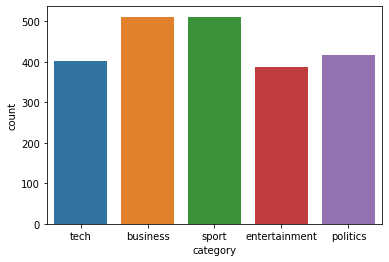

In [470]:
import seaborn as sns

sns.countplot(x='category',data = data)

###Remove the duplicate rows

In [471]:
df.drop_duplicates(subset=['category', 'text'], inplace=True)

In [472]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

###Most frequent words

In [473]:
from nltk import FreqDist
# function to plot most frequent terms

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

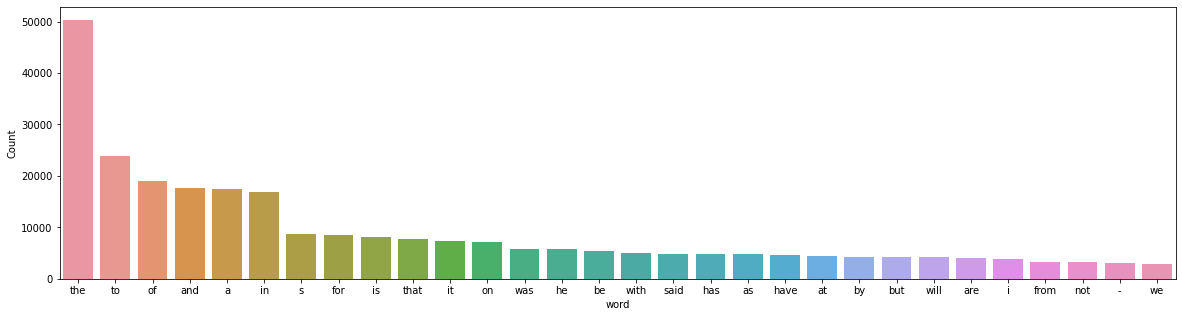

In [474]:
freq_words(df['text'])

###Word Cloud for column 'Text'

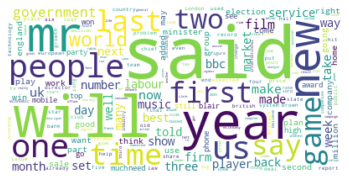

In [475]:
from wordcloud import WordCloud

text2 = " ".join(text for text in df.text)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [476]:
import nltk
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

###Load the stopwords list

In [477]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Lemmatization

In [478]:
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 


In [479]:
print("Stop Words\n\n",stopWords)

Stop Words

 {'into', 'don', 'which', 'what', 'then', 'their', 'had', 'against', 'they', 'does', 'same', "don't", 'shouldn', 'doesn', 'before', "doesn't", 'for', 'it', "she's", "wouldn't", 'own', "that'll", 'y', 'how', 'no', 'can', "won't", 'were', 'whom', 'to', 'now', "should've", 'where', 'should', 'yours', 'the', 'nor', "weren't", 'did', 'myself', "wasn't", 'i', 'that', 'only', 'her', 'themselves', 'm', 'isn', 'over', 'each', 'more', 'wouldn', 't', 'off', 'but', "you're", 'who', 'do', 'she', "mightn't", 'those', "couldn't", 'with', 's', 'mightn', 'up', 'a', 'shan', 'are', 'theirs', 'have', 'yourselves', 'at', 'about', 'from', 'our', 'we', 'wasn', 'o', 'hasn', 'won', 'by', 'be', 'under', 'between', 'through', 'just', 'was', 'is', 'itself', 'and', 'on', 'such', 'because', 'there', 'ain', 'too', 'hadn', 'as', 'out', "aren't", 'these', 'its', 'ma', 'doing', 'he', "mustn't", 'other', 'above', 'needn', "you've", 'so', 'further', 'him', "hadn't", 'aren', 'of', 've', 'me', 'this', 'ours', '

###Tokenization & Pre-Processing the text

In [480]:
def words_processing(text):
    words = text.split()
    New_words = []
    
    for word in words:
        # Add the words which are not stop words.
        if word not in stopWords:
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word, pos ='v')
            New_words.append(word)
  
    return " ".join(New_words)  # concatenate the string


def pre_process(text):
    # convert to lower case
    text = text.lower()
    
    # replace non-alphabets with null
    text = re.sub('[^a-zA-Z ]','',text)
    
    #remove all the stop words
    text = words_processing(text)
    
    return text

In [481]:
from keras.preprocessing.text import Tokenizer


###Download all NLTK libraries

In [482]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [483]:
text_sample = data['text'][50]

print("Sample Text/headline of article before Pre-Processing:\n\n", text_sample)

Sample Text/headline of article before Pre-Processing:

 lewsey puzzle over disallowed try england s josh lewsey has claimed he was denied a late try in his side s six nations loss to ireland.  the wasps wing insisted he grounded the ball when he was bundled over the line and said referee jonathan kaplan had made a wrong decision.  i m positive i touched the ball down over the line   lewsey told bbc sport.  it certainly wasn t a turnover.  i was driven over and i put the ball on the ground. the whistle went and i let go of the ball.  lewsey added:  one of the irish players scooped it back after the whistle and to our surprise the referee then gave a turnover.  as far as i m concerned  that incident and mark cueto s effort from charlie hodgson s cross-field kick that led to what looked like a good try were the two key elements in the game.   cueto was also puzzled as to why his try had been disallowed by kaplan.  i don t think i could have been offside for  without a doubt  i was behind

In [484]:
sample_pre_proc = pre_process(text_sample)
print("Sample Text/headline of article after Pre-Processing:\n\n",sample_pre_proc)

Sample Text/headline of article after Pre-Processing:

 lewsey puzzl disallow tri england josh lewsey claim deni late tri side six nation loss ireland wasp wing insist grind ball bundl line say refere jonathan kaplan make wrong decis posit touch ball line lewsey tell bbc sport certainli turnov drive put ball grind whistl go let go ball lewsey ad one irish player scoop back whistl surpris refere give turnov far concern incid mark cueto effort charli hodgson crossfield kick lead look like good tri two key element game cueto also puzzl tri disallow kaplan think could offsid without doubt behind ball say sale player move plan techniqu cuff rehear time time say rob decis go go today go us tough intern level


###Pre Processing application on entire BBC News dataset

In [485]:
x = data['text'].apply(lambda x:pre_process(x))
print(x[:1])

0    tv futur hand viewer home theatr system plasma...
Name: text, dtype: object


###Converting the text into suitable features

In [486]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

vector_counts = count_vectorizer.fit_transform(x)
tfidf_z = tfidf_vectorizer.fit_transform(x)

In [487]:
i_new = vector_counts

###Creating labels for Targets

In [488]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 


labelEncoder = LabelEncoder()
label_trans = labelEncoder.fit_transform( data['category'] )
print("Label Encodings:\n\n",label_trans)

Label Encodings:

 [4 0 3 ... 1 2 3]


###Split the data into Train & Test

In [489]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(i_new,label_trans,test_size=0.18)
print("Size of Training data:",x_train.shape[0])
print("Size of Testing data:",x_test.shape[0])

Size of Training data: 1824
Size of Testing data: 401


###Import library to train Multinomial Naive Bayes

In [490]:

from sklearn.naive_bayes import MultinomialNB

###Training the Multinomial Naive Bayes Model

In [491]:
nb_model = MultinomialNB()

In [492]:
nb_model.fit(x_train,y_train)

MultinomialNB()

###Check the accuracy

In [493]:
def check_accuracy(model,x_test,y_test):
    total = x_test.shape[0]
    count =  0
    res = model.predict(x_test)
    for i in range(total):
        y_true = y_test[i]
        if y_true == res[i]:
            count+=1
    return count/total

###Accuracy for Naive Bayes Classifier

In [494]:
Acc_NB=check_accuracy(nb_model,x_test,y_test)

In [495]:
print("Accuracy Naive Bayes:",Acc_NB)

Accuracy Naive Bayes: 0.970074812967581


###Save the model for future use

In [496]:
import joblib
joblib.dump(nb_model, 'NB_bbc_news.pkl')

['NB_bbc_news.pkl']

In [497]:
NB_bbc_news = open('NB_bbc_news.pkl','rb')
clf = joblib.load(NB_bbc_news)

In [498]:
Test_data = "tigers wary of farrell gamble leicester say"
#Processed Data
processed_data = pre_process(Test_data)
y_sample = count_vectorizer.transform([processed_data])

###Predict to get the results

In [499]:
naive_bayes_final_result =  nb_model.predict(y_sample)
naive_bayes_final_result = labelEncoder.inverse_transform(naive_bayes_final_result)

###After prediction for test data we get the result i.e category of the article headline text

In [500]:
print("Naive Bayes - Category of news article:\n\n", naive_bayes_final_result)

Naive Bayes - Category of news article:

 ['sport']


###Compare the results by training model with Logistic Regression & DecisionTree Classifier

In [501]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

###Train the model

In [502]:
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
model = LinearSVC()
random_forest=RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)


In [503]:
logistic_model.fit(x_train,y_train)
decision_tree_model.fit(x_train,y_train)
model.fit(x_train,y_train)
random_forest.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


RandomForestClassifier(criterion='entropy', random_state=0)

In [504]:
Acc_logis=check_accuracy(logistic_model,x_test,y_test)
Acc_Decission_T=check_accuracy(decision_tree_model,x_test,y_test)
Acc_linear_SVC = check_accuracy(model,x_test,y_test)
Acc_random_forest = check_accuracy(random_forest,x_test,y_test)

###Accuracy for Logistic Regression & Decision Tree Models

In [505]:
print("Accuracy for Logistic Regression:",Acc_logis)
print("Accuracy for Desicion Tree :",Acc_Decission_T)
print("Accuracy for Linear SVC :",Acc_linear_SVC)
print("Accuracy for Random Forest Classifier",Acc_random_forest)

Accuracy for Logistic Regression: 0.9650872817955112
Accuracy for Desicion Tree : 0.8329177057356608
Accuracy for Linear SVC : 0.9600997506234414
Accuracy for Random Forest Classifier 0.9501246882793017


In [506]:
logistic_final_result = logistic_model.predict(y_sample)
deci_tree_final_result = decision_tree_model.predict(y_sample)
random_forest_final_result = random_forest.predict(y_sample)

logistic_final_result = labelEncoder.inverse_transform(logistic_final_result)
deci_tree_final_result = labelEncoder.inverse_transform(deci_tree_final_result)
random_forest_final_result = labelEncoder.inverse_transform(random_forest_final_result)

In [507]:
print("Logistic Regression - Category of news article:\n\n", logistic_final_result)
print("Decision Tree - Category of news article:\n\n", deci_tree_final_result)

Logistic Regression - Category of news article:

 ['sport']
Decision Tree - Category of news article:

 ['entertainment']


In [508]:
print("Random Forest - Category of news article:\n\n", random_forest_final_result)


Random Forest - Category of news article:

 ['sport']


###Bar Plot for Accuracy in %

Comparision across different models

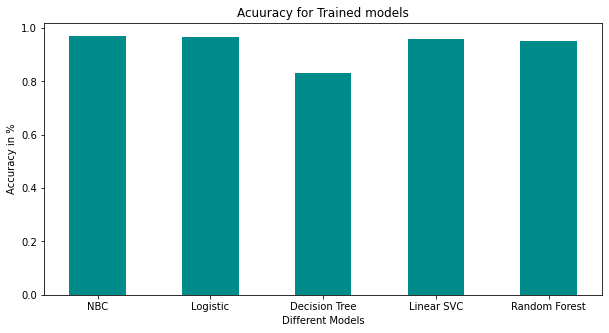

In [510]:
acc_list = {'NBC':Acc_NB, 'Logistic':Acc_logis, 'Decision Tree':Acc_Decission_T,'Linear SVC':Acc_linear_SVC,'Random Forest':Acc_random_forest}
train_models = list(acc_list.keys())
accuracy_in_per = list(acc_list.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(train_models, accuracy_in_per, color ='darkcyan',
        width = 0.5)
plt.xlabel("Different Models")
plt.ylabel("Accuracy in %")
plt.title("Acuuracy for Trained models")
plt.show()